In [4]:
!pip install ydata-profiling --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00


In [5]:
#from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd, numpy as np,  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns, pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/tmp/ipython-input-6-2520408180.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
dz = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Expresso_churn_dataset.csv')
dz.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Expresso_churn_dataset.csv')
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [10]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [11]:
df.isnull().sum()

,0
user_id,0
REGION,849299
TENURE,0
MONTANT,756739
FREQUENCE_RECH,756739
REVENUE,726048
ARPU_SEGMENT,726048
FREQUENCE,726048
DATA_VOLUME,1060433
ON_NET,786675


In [12]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.isnull().sum()

,0
user_id,0
REGION,0
TENURE,0
MONTANT,0
FREQUENCE_RECH,0
REVENUE,0
ARPU_SEGMENT,0
FREQUENCE,0
DATA_VOLUME,0
ON_NET,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
#profile = ProfileReport(df)
#profile.to_file('data_report.html')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


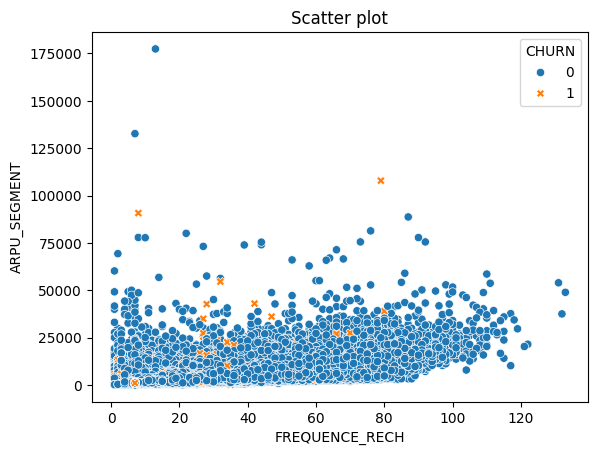

In [16]:
sns.scatterplot(data=df, x='FREQUENCE_RECH', y='ARPU_SEGMENT', hue='CHURN', style='CHURN')
plt.title('Scatter plot')
plt.show()

In [17]:
df['CHURN'].value_counts()

,count
CHURN,
0,1750062
1,403986


In [18]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    #le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [19]:
X = df.drop(['CHURN'], axis=1)
y = df['CHURN']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
X_pred = model.predict(X_train)
fgd = accuracy_score(X_pred, y_train)

In [24]:
print('Accuracy Score of the Test Data: ', fgd)

Accuracy Score of the Test Data:  0.8200399480512849


In [25]:
y_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [26]:
print('Accuracy Score of the Test Data: ', test_data_accuracy)

Accuracy Score of the Test Data:  0.8201713052157563


In [27]:
df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [28]:
class_report = classification_report(y_pred, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90    415285
           1       0.12      0.61      0.20     15525

    accuracy                           0.82    430810
   macro avg       0.55      0.72      0.55    430810
weighted avg       0.95      0.82      0.87    430810



In [29]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [30]:
new = pickle.load(open('model.pkl', 'rb'))

In [31]:
X.iloc[2]

,2
user_id,2.0
REGION,0.0
TENURE,7.0
MONTANT,3600.0
FREQUENCE_RECH,2.0
REVENUE,1020.0
ARPU_SEGMENT,340.0
FREQUENCE,2.0
DATA_VOLUME,257.0
ON_NET,90.0


In [32]:
new.predict(X.iloc[2].values.reshape(1,-1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [33]:
for i,j in enumerate(dz.columns):
    if dz[j].dtype == 'object':
        print(i, j)

0 user_id
1 REGION
2 TENURE
14 MRG
16 TOP_PACK


In [ ]:
col_val = {}
for i in dz.columns:
    if dz[i].dtype == 'object':
        print(dz[i].unique())
        col_val[i] = dz[i].unique()

['00000bfd7d50f01092811bc0c8d7b0d6fe7c3596'
 '00000cb4a5d760de88fecb38e2f71b7bec52e834'
 '00001654a9d9f96303d9969d0a4a851714a4bb57' ...
 'fffff172fda1b4bb38a95385951908bb92379809'
 'fffff5911296937a37f09a37a549da2e0dad6dbb'
 'fffff6dbff1508ea2bfe814e5ab2729ce6b788c2']
['FATICK' nan 'DAKAR' 'LOUGA' 'TAMBACOUNDA' 'KAOLACK' 'THIES'
 'SAINT-LOUIS' 'KOLDA' 'KAFFRINE' 'DIOURBEL' 'ZIGUINCHOR' 'MATAM'
 'SEDHIOU' 'KEDOUGOU']
['K > 24 month' 'I 18-21 month' 'G 12-15 month' 'H 15-18 month'
 'J 21-24 month' 'F 9-12 month' 'D 3-6 month' 'E 6-9 month']
['NO']
['On net 200F=Unlimited _call24H' nan 'On-net 1000F=10MilF;10d'
 'Data:1000F=5GB,7d' 'Mixt 250F=Unlimited_call24H'
 'MIXT:500F= 2500F on net _2500F off net;2d' 'All-net 500F=2000F;5d'
 'On-net 500F_FNF;3d' 'Data: 100 F=40MB,24H'
 'MIXT: 200mnoff net _unl on net _5Go;30d' 'Jokko_Daily'
 'Data: 200 F=100MB,24H' 'Data:490F=1GB,7d' 'Twter_U2opia_Daily'
 'On-net 500=4000,10d' 'Data:1000F=2GB,30d' 'IVR Echat_Daily_50F'
 'Pilot_Youth4_490' 'All-net 50

In [ ]:
len(col_val)

5

In [ ]:
name = pickle.dump(col_val, open('married_fuga.pkl', 'wb'))

In [ ]:
chk = pickle.load(open('married_fuga.pkl', 'rb'))
chk

{'user_id': array(['00000bfd7d50f01092811bc0c8d7b0d6fe7c3596',
        '00000cb4a5d760de88fecb38e2f71b7bec52e834',
        '00001654a9d9f96303d9969d0a4a851714a4bb57', ...,
        'fffff172fda1b4bb38a95385951908bb92379809',
        'fffff5911296937a37f09a37a549da2e0dad6dbb',
        'fffff6dbff1508ea2bfe814e5ab2729ce6b788c2'], dtype=object),
 'REGION': array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
        'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
        'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object),
 'TENURE': array(['K > 24 month', 'I 18-21 month', 'G 12-15 month', 'H 15-18 month',
        'J 21-24 month', 'F 9-12 month', 'D 3-6 month', 'E 6-9 month'],
       dtype=object),
 'MRG': array(['NO'], dtype=object),
 'TOP_PACK': array(['On net 200F=Unlimited _call24H', nan, 'On-net 1000F=10MilF;10d',
        'Data:1000F=5GB,7d', 'Mixt 250F=Unlimited_call24H',
        'MIXT:500F= 2500F on net _2500F off net;2d',
        'All-net 500F=2000F;5